# Lecture 13 - Introduction to Machine Learning

## 1. Overview 

**Machine learning** (ML) is a branch of artificial intelligence that involves **training algorithms** to make **predictions** or decisions based on data, **without being explicitly programmed**.
- Applications:
    - Finance: Stock price prediction, fraud detection, risk analysis, customer segmentation, etc.
    - Other fields: Image recognition, natural language processing, recommendation systems.
    
    
In `Python`, `scikit-learn` is a powerful **library** for machine learning that provides tools for preprocessing data, training models, and evaluating them. 

This notebook covers:
- **Supervised** and **Unsupervised** learning
- **Data** preparationg
- Using `scikit-learn` :
    - **Importing** ML model class
    - **Instantiating** a model object
    - **Fitting** the model object to data
    - **Predicting** the outcome given the fitted model for some data

## 2. A primer on Machine Learning

**Machine learning** is a **prediction technology**:
1. **Training/learning**: Learn patterns from previous outcomes (data)
2. **Evaluation/deployment**: Given new inputs, predict most likely outcome

### 2.1 Classes of machine learning models

- **Supervised Learning**: The model learns from **labeled data** (i.e., input-output pairs). 
    - Examples
        - Regression: Predicting a continuous value (e.g., stock prices, real estate values).
        - Classification: Predicting a categorical label (e.g., credit approval, fraud detection).
- **Unsupervised Learning**: The model learns from **unlabeled data** to find hidden patterns or groupings. 
    - Example
        - Clustering: Grouping data points based on similarities (e.g., customer segmentation).
        - Dimensionality Reduction: Reducing the number of features while preserving the most important information (e.g., PCA).
- **Reinforcement Learning** (skip): The model learns through interactions with an environment and feedback from its actions.
    - Example: Algorithmic trading

#### Visual intuition

**Raw data**
<center><img src="Figures/ml-learning-data.jpg"></center>

**Supervised learning**

Necessary dimension: **Labelled data**
<center><img src="Figures/ml-learning-label.jpg"></center>

**Supervised learning**

<center><img src="Figures/ml-learning-supervised.jpg"></center>

**Unsupervised learning**

<center><img src="Figures/ml-learning-unsupervised.jpg"></center>

**Other example**

<center><img src="Figures/ml-learning-classes-1.jpg"></center>

### 2.2 Workflow

1. **Problem Definition**
2. **Data**
    - Collection
    - Preparation
        - missing values, encoding of categorical variables, etc.
    - Exploration
    - Feature engineering
        - create suitable features for the predictions
    - **Split**
        - training versus evaluation
3. **Learning**
    - Model selection
    - Training
    - Evaluation
    - Tuning
4. **Deployment**
    

### 2.3 Sample split: training vs evaluation

A **sample split** in machine learning involves dividing a dataset into separate subsets to train, validate, and test a model. 

**Why Do We Need to Split Data?**
Splitting data is crucial for:
- **Evaluating Generalization**: To test how the model performs on unseen data.
- **Preventing Overfitting**: Ensures the model isn't overly tailored to the training data.
- **Model Tuning**: Provides a way to tune hyperparameters without bias from the training data.

(Mostly for **supervised** learning)

<img src = "Figures/overfitting.png"></img>

#### Splits

- **Training Set**: The model learns patterns and relationships from this data.
   - **Purpose**: Used to train the machine learning model.
   - **Size**: Typically 60-80% of the total data.
- **Validation Set**: Helps with model selection and prevents overfitting by providing feedback during training.
   - **Purpose**: Used for tuning hyperparameters and evaluating the model during training.
   - **Size**: Usually 10-20% of the total data.
- **Test Set**: Offers an unbiased assessment of model final performance on unseen data.
   - **Purpose**: Used for final evaluation after training and validation.
   - **Size**: Commonly 10-20% of the total data.

#### Splitting Techniques

- **Random Split**: Randomly divides data into training, validation, and test sets. Common for general purposes.
- **Stratified Split**: Ensures proportional representation of classes, useful for imbalanced datasets.
- **Cross-Validation**: Splits data into `k` folds and trains the model `k` times, each time using a different fold as the validation set.

## 3. Unsupervised Learning

In **unsupervised learning**, machine learning algorithms discover insights from raw data without any further guidance. 

One such algorithm is the **k- means clustering** algorithm that clusters a raw data set into a number of subsets and assigns these subsets labels (`cluster 0`, `cluster 1`, etc.). 

### 3.1 Data

`scikit-learn` allows the creation of sample data sets for different types of ML problems. 

The following uses the method `make_blobs()` to create a sample data set suited to illustrating k-means clustering.

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('seaborn-v0_8-dark') 
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)

/Users/tarikrouknyornia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tarikrouknyornia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


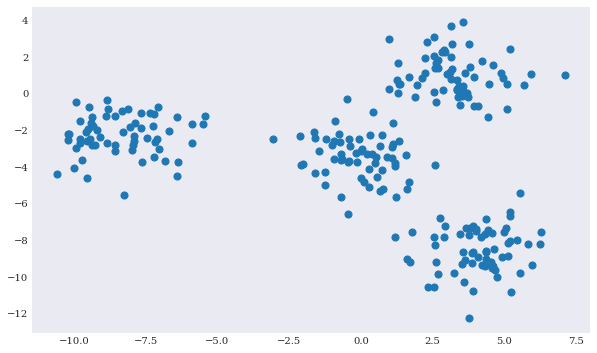

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, centers=4,
                              random_state=500, cluster_std=1.25)

plt.figure(figsize = (10,6));
plt.scatter(X[:,0], X[:,1], s = 50);

### 3.2. K-means clustering

#### A primer on K-means clustering

**K-Means** is an **unsupervised learning algorithm** used for **clustering** data.

- **Goal**: partition data into **K distinct clusters** based on similarities.
    - Each data point is assigned to the **nearest cluster**
        - Based on distance to the **centroid** $\mu_k$ (the cener of the cluster $k$).
    - The algorithm minimizes the **inertia** $J$
        - Sum of squared distances between points and their nearest cluster center.
$$
J = \sum_{k=1}^{K} \sum_{i \in C_k} \| x_i - \mu_k \|^2
$$

- **Algorithm**
    1. **Initialization**: 
       - Choose `K` initial centroids randomly or using smarter methods (e.g., k-means++).
    2. **Assignment Step**: 
       - Assign each data point to the nearest cluster centroid based on Euclidean distance.
    3. **Update Step**:
       - Recalculate the centroids by finding the mean of all points assigned to each cluster.
    4. **Repeat**:
       - Repeat the assignment and update steps until the centroids no longer change significantly (convergence).
    5. **Output**:
       - Final centroids and cluster assignments for each point.

**Visualisation**
<center><img src="Figures/kmeans.png" width = 500></img></center>

#### Workflow

##### Step 1 - Importing and instantiating the `KMeans` model class

The `scikit-learn` library contains a family class `cluster` with a subclass `KMeans`.

```python
    from sklearn.cluser import KMeans
    model = KMeans (param)
```
Parameters for the instantiation of a `KMeans` object:
- `n_clusters`: Number of clusters to form.
- `random_state`: Ensures reproducibility by fixing the random initialization of centroids.
- `max_iter`: The maximum number of iterations to run the algorithm.
- `init`: The method for initializing centroids (e.g., 'random', 'k-means++').
- `tol`: The tolerance to declare convergence.

##### Step 2 - Fitting the model to the data

Fitting the model to the data obtains with the method `.fit()` with the data as input.

```python
    model.fit(X)
```

This is where the optimization takes place.

##### Step 3 - Prediction

Predicting clusters obtains with the method `.predict` with the data as input.

```python
    labels = model.predict(X)
```

The method associates a cluster label to each data point.

#### Application

In [4]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters = 4, random_state = 0)
model.fit(X)
y_kmeans = model.predict(X)

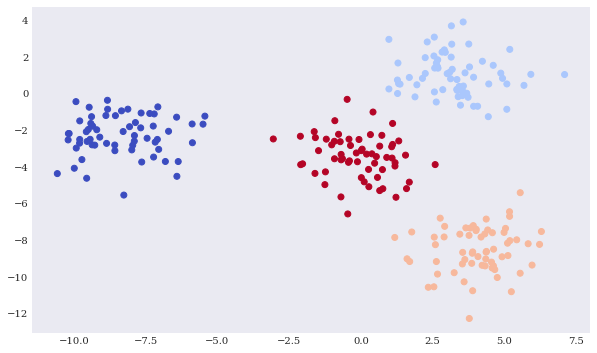

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm');

#### Step 4 - Parameter tuning (`k`)

Selecting the **optimal number** of clusters is crucial for meaningful results.

- Common techniques to determine `K`:
  - **Elbow Method**: Plot the inertia for different values of `K` and look for an "elbow" where the decrease in inertia slows down.
  - **Silhouette Score**: Measures how similar a point is to its cluster compared to other clusters.

## 4. Supervised Learning

In **supervised learning**, machine learning is achieved with **guidance** in the form of known results or **labelled** data: the raw data already contains what the ML algorithm is supposed to learn.

- The previous example showed that with unsupervised learning the algorithms come up with their own categorical labels for the clusters identified. With four clusters, the labels are 0, 1, 2, and 3. 
- In supervised learning, such categorical labels are already given, so that the algorithm can learn the relationship between the features and the categories (classes). In other words, during the fitting step, the algorithm knows the right class for the given feature value combinations.

**Types of supervised learning algorithms**

| Algorithm                | Quick Description                          | Common Use Cases                      |
|--------------------------|--------------------------------------------|----------------------------------------|
| Linear Regression        | A model that fits a linear relationship    | Predicting continuous values          |
| Logistic Regression      | A model for binary/multiclass classification | Binary/multiclass classification    |
| Decision Trees           | Tree-like structure for decision making    | Easy-to-interpret models              |
| Support Vector Machines  | Finds the optimal boundary for classification | High-dimensional data              |
| k-Nearest Neighbors (k-NN) | Classifies based on closest data points | Simple, non-parametric models      |
| Naive Bayes              | Based on Bayes' theorem with strong independence assumptions | Text classification, spam detection |
| Random Forest            | Ensemble of decision trees for better performance | Ensemble learning for robust predictions |
| Gradient Boosting        | Combines weak models to form a strong model | Improving weak learners               |
| Neural Networks          | Mimics the human brain with layers of nodes | Complex patterns and non-linear relationships |
| Ridge/Lasso Regression   | Linear models with regularization to prevent overfitting | Regularized linear models            |

The following covers:
- Logistic regressions
- Decision trees
- Random Forests

### 4.1 Data

`scikit-learn` allows the creation of sample data sets for supervised ML problems.

The following uses the method `make_classification()` to create a sample data set suited to illustrating classification techniques.

In [11]:
from sklearn.datasets import make_classification

In [51]:
n_samples = 1000
X, y = make_classification(n_samples=n_samples, n_features=2,
                                         n_informative=2, n_redundant=0,
                                         n_repeated=0, random_state=250)

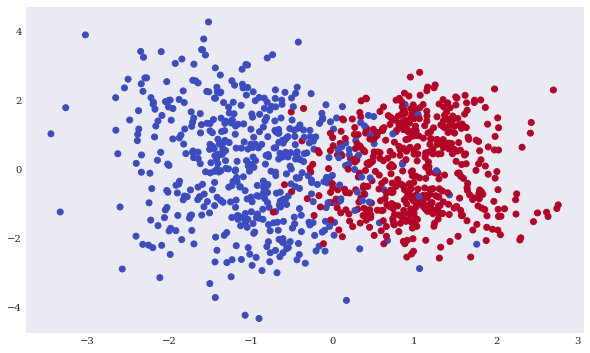

In [52]:
plt.figure(figsize = (10,6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm')

### 4.2 Logistic regression

#### A primer on Logistic regressions

- **Logistic Regression** models the probability of a particular class, using the **logistic function** (also known as the **sigmoid function**).
    - **Linear Regression**: Predicts a continuous output (regression tasks).
    - **Logistic Regression**: Predicts the probability of categorical outcomes (classification tasks).
- Output is a probability value between 0 and 1, which is then used to classify data into different classes (e.g., true/false).


<center><img src="Figures/logistic.png"></img></center>

#### Workflow

##### Step 1 - Importing and instantiating the `Logistic` model class

The `scikit-learn` library contains a family class `linear_model` with a subclass `LogisticRegression`.

```python
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(param)
```

##### Step 2 - Fitting the model to the data

Fitting the model to the data obtains with the method `.fit()` with the data and label as input.

```python
    model.fit(X,y)
```

This is where the optimization takes place.

##### Step 3 - Prediction

Predicting clusters obtains with the method `.predict` with the data as input.

```python
    pred = model.predict(X)
```

The method associates a prediction output to each data point.

#### Application

In [20]:
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(C = 1, solver = 'lbfgs')
model = LogisticRegression()

model.fit(X,y)

pred = model.predict(X)

#### Step 4 - Evaluation

Given the prediction of the model, there are several ways to **assess the performance** of the model. 

**Pairing outcomes**:

| Actual \ Predicted | Positive Prediction | Negative Prediction |
|---------------------|----------------------------|------------------------------|
| Positive   | True Positive (TP)         | False Negative (FN)          |
| Negative   | False Positive (FP)        | True Negative (TN)           |



In [23]:
Xc = X[y == pred]
Xf = X[y != pred]

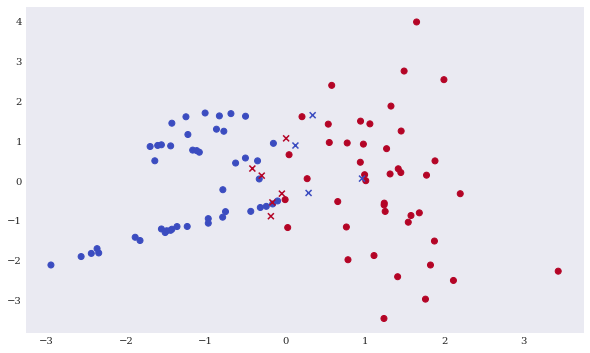

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
                         marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
                         marker='x', cmap='coolwarm');

**Performance metrics**
- **Accuracy**: The ratio of correct predictions to total predictions.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
- **Precision**: The ratio of true positives to predicted positives.
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
- **Recall**: The ratio of true positives to actual positives.
$$
\text{Recall} = \frac{TP}{TP + FN}
$$


- **F1 Score**: The harmonic mean of precision and recall, providing a single measure that balances both.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y, pred)
precision = precision_score(y, pred)  
recall = recall_score(y, pred)  
f1 = f1_score(y, pred)              

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.92
Recall: 0.88
F1 Score: 0.90


### 4.3 Decision trees


#### A primer on Decision tress

**Decision trees** model decisions as a tree-like structure, where:
  - **Internal nodes** represent a feature or attribute on which the data is split.
  - **Branches** represent the outcome of the decision based on that feature.
  - **Leaf nodes** represent the final output or class label.

Decision trees are easy to interpret and can handle both numerical and categorical data.

```mermaid
%%{init: {'themeVariables': {'fontSize': '12px'}}}%%
%%{init: {'theme':'neutral'}}%%
graph LR
    B{credit score < 600?}
    B -- Yes --> C[High risk of default]
    B -- No --> D{debt-to-income ratio > 40%?}
    D -- Yes --> E[Moderate risk of default]
    D -- No --> F{Missed payments in the past?}
    F -- Yes --> G[Moderate risk of default]
    F -- No --> H[Low risk of default]
```

**Overfitting**:

With enough depth, a decision tree can fit any data. Need to **split** data.

#### Workflow

##### Step 1 - Train-test split data

Data needs to be split in 2 parts:
  1. **Training Set**: Used to train the model.
        - Typically, 70-80% of the data is used for training the model.
  3. **Test Set**: Used to evaluate the model's performance.
        - The remaining 20-30% is used for testing the model.


The `scikit-learn` library contains a family class `model_selection` with a subclass `train_test_split`.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
```

Parameters in `train_test_split`

- **`test_size`**: Specifies the proportion of the dataset to include in the test split. For example, `test_size=0.2` means 20% of the data will be used as the test set.
- **`train_size`**: Alternatively, you can specify the size of the training set. If not provided, the complement of `test_size` is used.
- **`random_state`**: Controls the shuffling of data before splitting. A fixed `random_state` ensures reproducibility, meaning the same split will be produced each time.
- **`shuffle`**: By default, the data is shuffled before splitting to ensure a random distribution between training and test sets.

##### Step 2 - Importing and instantiating the `DecisionTree` model class

The `scikit-learn` library contains a family class `tree` with a subclass `DecisionTreeClassifier`.

```python
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(param)
```
With parameters:
- `max_depth`: The maximum depth of the tree. Limiting depth prevents overfitting.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be in a leaf node.
- `criterion`: The function used to measure the quality of a split (e.g., `gini` for Gini impurity or `entropy` for information gain in classification, `mse` for regression).
- `max_features`: The number of features to consider when looking for the best split.

##### Step 3 - Fitting the model to data

Fitting the model to the data obtains with the method `.fit()` with the training data and label as input.
```python
    model.fit(X_train,y_train)
```
This is where the optimization takes place.

##### Step 4 - Prediction

Predicting clusters obtains with the method `.predict()` with the test data as input.
```python
    y_pred = model.predict_proba(X_test)
```
The method associates an output prediction to each data point.

#### Application

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (800, 2)
Test set size: (200, 2)


In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=1)

In [55]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [56]:
y_pred = model.predict(X_test)

#### Step 5 - Evaluation

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.92
Recall: 0.94
F1 Score: 0.93


In [63]:
Xc = X_test[y_test == y_pred]
Xf = X_test[y_test != y_pred]

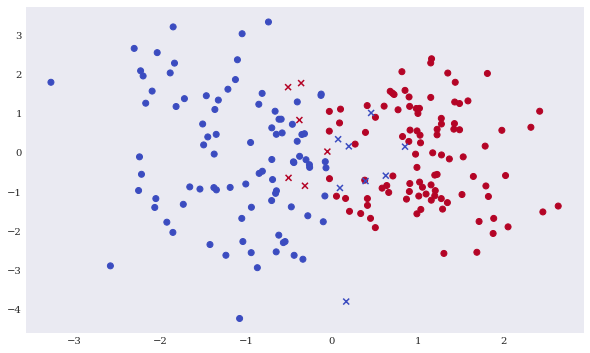

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y_test[y_test == y_pred],
                         marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y_test[y_test != y_pred],
                         marker='x', cmap='coolwarm');

*Increasing maximum depth*

In [67]:
print('{:>8s} | {:10s} | {:10s} | {:10s} | {:10s}'.format('depth', 'accuracy', 'precision', 'recall', 'f1')) 
print(60 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth) 
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test)) 
    # accuracy = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,model.predict(X_test))
    rec = recall_score(y_test,model.predict(X_test))
    f1 = f1_score(y_test,model.predict(X_test))
    print('{:8d} | {:10.2f} | {:10.2f} | {:10.2f} | {:10.2f}'.format(depth, acc, prec, rec, f1))

   depth | accuracy   | precision  | recall     | f1        
------------------------------------------------------------
       1 |       0.93 |       0.92 |       0.94 |       0.93
       2 |       0.93 |       0.92 |       0.94 |       0.93
       3 |       0.93 |       0.92 |       0.94 |       0.93
       4 |       0.91 |       0.93 |       0.89 |       0.91
       5 |       0.93 |       0.92 |       0.93 |       0.93
       6 |       0.91 |       0.93 |       0.89 |       0.91


In [ ]:
print('{:>8s} | {:10s} | {:10s} | {:10s} | {:10s}'.format('depth', 'accuracy', 'precision', 'recall', 'f1')) 
print(60 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth) 
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X_test)) 
    # accuracy = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,model.predict(X_test))
    rec = recall_score(y_test,model.predict(X_test))
    f1 = f1_score(y_test,model.predict(X_test))
    print('{:8d} | {:10.2f} | {:10.2f} | {:10.2f} | {:10.2f}'.format(depth, acc, prec, rec, f1))

# Pending

## 3.4 Random Forests

### 3.4 Train-test splits

#### What is Train-Test Split?

- **Train-Test Split** is a technique used in machine learning to evaluate how well a model generalizes to unseen data.
- The dataset is divided into two parts:
  1. **Training Set**: Used to train the machine learning model. The model learns patterns and relationships from this data.
  2. **Test Set**: Used to evaluate the model's performance. The test set acts as unseen data that the model has not encountered during training.
- The goal is to measure the model's ability to generalize to new, unseen data, and avoid **overfitting** (where the model performs well on training data but poorly on unseen data).

#### Why Do We Need Train-Test Split?

- **Generalization**: The purpose of machine learning is to build models that generalize well to unseen data. The test set provides an independent evaluation of how the model will perform in the real world.
- **Overfitting Prevention**: If you train and test a model on the same data, the model may overfit to the training data. By evaluating on a separate test set, you get a better indication of how well the model truly performs.
- **Model Evaluation**: The test set helps assess metrics such as accuracy, precision, recall, F1-score, or mean squared error on unseen data.

#### How Train-Test Split Works

- The dataset is split into two parts:
  - **Training Set**: Typically, 70-80% of the data is used for training the model.
  - **Test Set**: The remaining 20-30% is used for testing the model.
- This split ensures that the model does not see the test set during training, and only interacts with it during evaluation.

**Train-Test Split Ratio**

- The **split ratio** refers to how the dataset is divided:
  - Common ratios include **80/20**, **70/30**, or **75/25** for training and test sets, respectively.
  - The choice of ratio can depend on the size of the dataset:
    - For **large datasets**, you may want a higher percentage of data in the training set (e.g., 80/20).
    - For **small datasets**, you may use a higher proportion of data for testing to ensure a robust evaluation.

#### `sklearn` and `train_test_split`

```python
from sklearn.model_selection import train_test_split

# Assuming X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train size is 80%, test size is 20%
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
```

Parameters in `train_test_split`

- **`test_size`**: Specifies the proportion of the dataset to include in the test split. For example, `test_size=0.2` means 20% of the data will be used as the test set.
- **`train_size`**: Alternatively, you can specify the size of the training set. If not provided, the complement of `test_size` is used.
- **`random_state`**: Controls the shuffling of data before splitting. A fixed `random_state` ensures reproducibility, meaning the same split will be produced each time.
- **`shuffle`**: By default, the data is shuffled before splitting to ensure a random distribution between training and test sets.

#### Overfitting and Underfitting

- **Overfitting**: Occurs when a model performs well on the training set but poorly on the test set. This usually happens when the model learns the noise and specific patterns in the training data, leading to poor generalization.
- **Underfitting**: Happens when a model is too simple and performs poorly on both the training and test sets. The model fails to capture the underlying patterns in the data.

**The Role of Train-Test Split:**
- By testing the model on unseen data, we can detect **overfitting** and **underfitting**.
- A significant difference between training and test accuracy indicates potential overfitting, whereas poor performance on both suggests underfitting.

### 3.5 Splitting with Random Forests

Background information on Random Forest [here](http://localhost:8888/notebooks/12.05%20-%20Random%20Forests.ipynb)

#### Loading the Iris Dataset

In this example, we’ll use the **Iris dataset**, a classic dataset for classification that contains 150 samples of iris flowers with 4 features: sepal length, sepal width, petal length, and petal width. The target is the species of the iris flower (three classes).

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (class labels)

- **`X`**: Represents the feature matrix containing the 4 features for each sample.
- **`y`**: Contains the class labels (0, 1, or 2), which correspond to the different species of iris flowers.

#### Splitting the Dataset into Training and Test Sets

We will split the dataset into 80% training data and 20% test data using `train_test_split` from `sklearn.model_selection`.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

**Explanation:**
- **`test_size=0.2`**: 20% of the data is set aside for testing, and 80% is used for training.
- **`random_state=42`**: Ensures reproducibility; every time the code is run, the split will be the same.
- After splitting, we check the sizes of the training and test sets to confirm that the split was performed correctly.

#### 3. Training a Random Forest Classifier

We will use a **Random Forest Classifier** from `sklearn.ensemble` to train the model on the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

**Explanation:**
- **`RandomForestClassifier`**: This algorithm creates multiple decision trees and combines their results to improve performance and reduce overfitting.
- **`n_estimators=100`**: The model will use 100 decision trees.
- The model is trained using the **training data** (`X_train`, `y_train`).

#### Evaluating the Model on the Test Set

After training, we will evaluate the model’s performance on the **test data** (`X_test`, `y_test`).

In [ ]:
from sklearn.metrics import accuracy_score

# Predict class labels on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.2f}")

**Explanation**
- **`predict(X_test)`**: The model predicts the class labels for the test data.
- **`accuracy_score`**: This function compares the predicted labels (`y_pred`) with the true labels (`y_test`) to compute the accuracy, which is the proportion of correctly classified samples.

#### Visualizing Feature Importance (Optional)

Random Forests provide a feature importance score, which indicates how useful each feature was in making the predictions.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances
feature_importances = clf.feature_importances_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()

**Explanation:**
- **`feature_importances_`**: This attribute provides the importance of each feature in determining the class labels.
- The bar plot shows which features (sepal length, sepal width, etc.) were most important in the model’s decisions.

#### Full Code Example

In [ ]:
# 1. Load Iris Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Predict on Test Set
y_pred = clf.predict(X_test)

# 5. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# 6. Visualize Feature Importance
feature_importances = clf.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()

#### Summary of Steps

1. **Load the dataset**: Use the Iris dataset, which is a standard dataset for classification tasks.
2. **Split the dataset**: Use `train_test_split` to divide the dataset into training and testing sets (80% train, 20% test).
3. **Train the model**: Fit a Random Forest classifier to the training data.
4. **Test the model**: Evaluate the model on the test set using accuracy.
5. **Feature Importance (Optional)**: Visualize which features were most important in the model's predictions.